## Lakshit Gupta, RNO: 17, UIDNO: 229020
## Time Series Project:

## Importing Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Electric_Production.csv', index_col = ['DATE'])
df.head()

,Value
DATE,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151


## Plot:

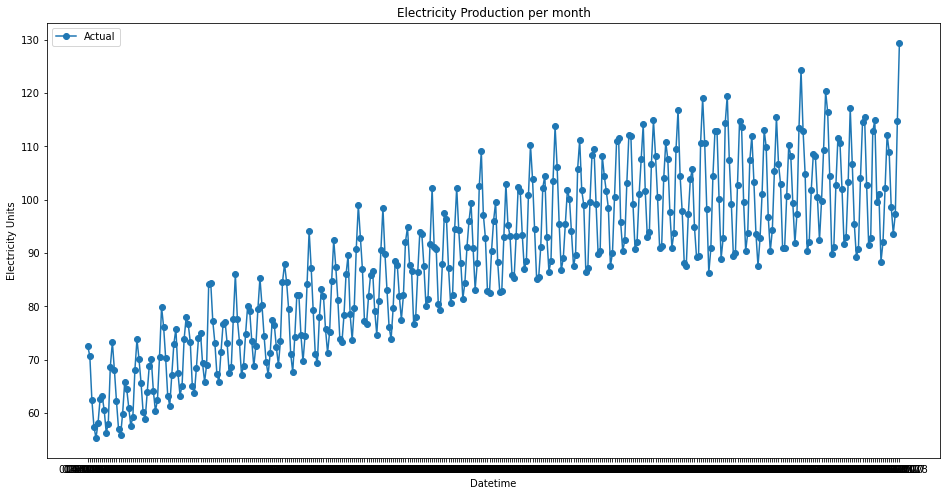

In [3]:
fig, ax = plt.subplots(figsize = (16, 8))

ax.plot(df.index, df['Value'], marker='o', label='Actual', linestyle='-')
ax.set_title("Electricity Production per month")
ax.set_xlabel("Datetime")
ax.set_ylabel("Electricity Units")
ax.legend()

plt.show()

## Time Series Components:

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

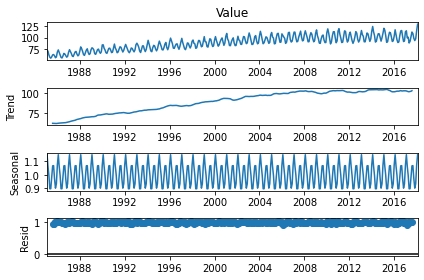

In [5]:
series = df['Value']

series.index = pd.date_range(start = df.index[0], periods = len(df), freq='M')

decomposition = seasonal_decompose(series, model = 'mutliplicative')
decomposition.plot()
plt.show()

## Stationarity:

In [6]:
from statsmodels.tsa.stattools import adfuller, kpss

Checking using ADF test:

In [7]:
result = adfuller(df['Value'].values, autolag = 'AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print(f'Critial Value at {key} = {value}')

ADF Statistic: -2.25699035004725
p-value: 0.18621469116586592
Critial Value at 1% = -3.4476305904172904
Critial Value at 5% = -2.869155980820355
Critial Value at 10% = -2.570827146203181


Since p-value is greater than 0.05, hence we fail to reject null hypothesis as a result the given time series data is non-stationary when checked with ADF.

Checking using KPSS test:

In [8]:
result = kpss(df['Value'].values)

print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')

KPSS Statistic: 3.5315970094994853
p-value: 0.01


C:\Users\laksh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Since the p-value is less than 0.05, hence we reject Null hypothesis and state the given time series in not trend stationary.

## Differencing:

In [9]:
df['M1'] = (df['Value'] - df['Value'].shift(1)).values

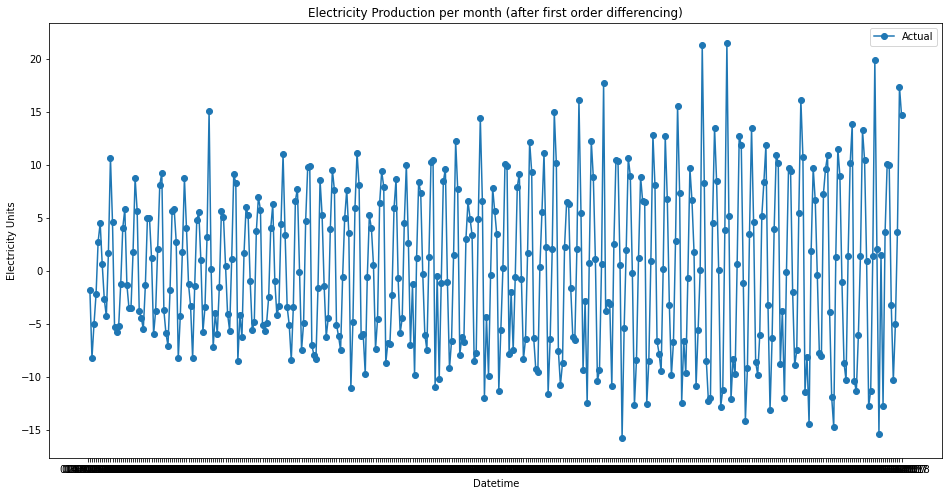

In [10]:
fig, ax = plt.subplots(figsize = (16, 8))

ax.plot(df.index, df['M1'], marker='o', label='Actual', linestyle='-')
ax.set_title("Electricity Production per month (after first order differencing)")
ax.set_xlabel("Datetime")
ax.set_ylabel("Electricity Units")
ax.legend()

plt.show()

## Checking Stationarity Again:

ADF test:

In [11]:
result = adfuller(df['M1'].dropna().values, autolag = 'AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print(f'Critial Value at {key} = {value}')

ADF Statistic: -7.104890882267312
p-value: 4.0777865655394095e-10
Critial Value at 1% = -3.4476305904172904
Critial Value at 5% = -2.869155980820355
Critial Value at 10% = -2.570827146203181


Since the p-value is less than 0.05, hence we reject Null hypothesis and state the given differenced time series data is now stationary.

KPSS test:

In [12]:
result = kpss(df['M1'].dropna().values)

print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')

KPSS Statistic: 0.14518934657460816
p-value: 0.1


C:\Users\laksh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


From above result, since the p-value is greater than 0.05, hence we fail to reject Null Hypothesis and state the differenced time series data is now trend stationary.

## 1. AR (Auto-Regressive Model):

In [13]:
from statsmodels.tsa.ar_model import AutoReg

Determining p:

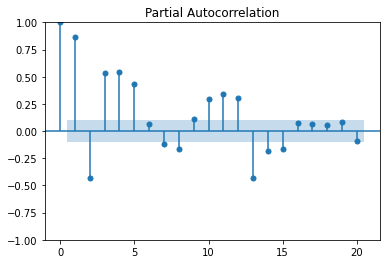

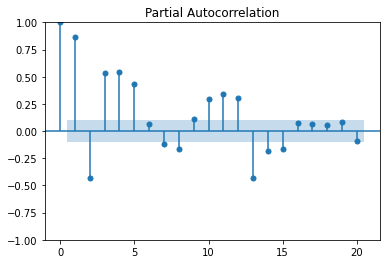

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot ACF and PACF for seasonal component
plot_pacf(df['Value'].dropna(), lags=20)

From above results, p can be of lags where the graph is significant. From above charts let us consider p = 4.

In [15]:
model = AutoReg(df['Value'][:-15], lags = 4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Value   No. Observations:                  382
Model:                     AutoReg(4)   Log Likelihood               -1070.498
Method:               Conditional MLE   S.D. of innovations              4.109
Date:                Sun, 24 Sep 2023   AIC                           2152.996
Time:                        19:55:07   BIC                           2176.605
Sample:                    05-31-1985   HQIC                          2162.366
                         - 10-31-2016                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1213      1.416      2.204      0.028       0.346       5.897
Value.L1       1.2221      0.042     29.204      0.000       1.140       1.304
Value.L2      -0.5398      0.074     -7.297      0.000      -0.685      -0.395
Value.L3      -0.2974      0.074     -4.014      0.000      -0.443      -0.152
Value.L4       0.5816      0.042     13.881      0.000       0.499       0.664
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0207           -0.0000j            1.0207           -0.0000
AR.2            0.5024           -0.9276j            1.0549           -0.1710
AR.3            0.5024           +0.9276j            1.0549            0.1710
AR.4           -1.5140           -0.0000j            1.5140           -0.5000
-----------------------------------------------------------------------------
"""

## Testing AR:

In [16]:
pred = model.predict(start = 381, end = 395, dynamic = False)

In [17]:
pred_df = pd.DataFrame(pred.values, columns = ['Forecasts'], index = df.index[-15:])
pred_df['Actual'] = (df['Value'].iloc[-15:]).values

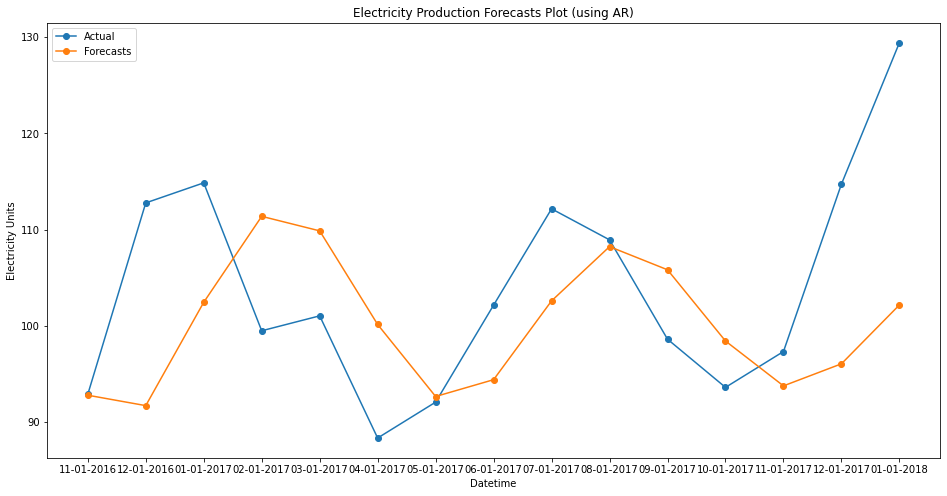

In [18]:
fig, ax = plt.subplots(figsize = (16, 8))

ax.plot(pred_df.index, pred_df['Actual'], marker='o', label='Actual', linestyle='-')
ax.plot(pred_df.index, pred_df['Forecasts'], marker = 'o', label = 'Forecasts', linestyle = '-')
ax.set_title("Electricity Production Forecasts Plot (using AR)")
ax.set_xlabel("Datetime")
ax.set_ylabel("Electricity Units")
ax.legend()

plt.show()

#### MSE and MAE:

In [19]:
print(mean_squared_error(pred_df['Actual'].dropna(), pred_df['Forecasts']))

152.31793553184556


In [20]:
print(mean_absolute_error(pred_df['Actual'].dropna(), pred_df['Forecasts']))

9.740746007956856


## Forecasting:

In [21]:
forecast = model.predict(start = 395, end = 455, dynamic = False)
forecast = pd.DataFrame(forecast, columns=['Prediction'])
forecast.index = pd.to_datetime(forecast.index)
forecast.index = forecast.index.strftime('%d-%m-%Y')

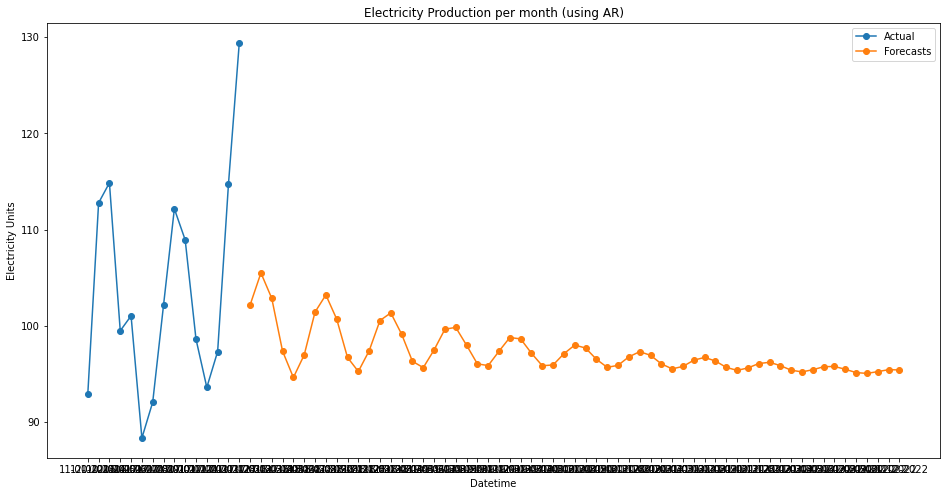

In [22]:
fig, ax = plt.subplots(figsize = (16, 8))

ax.plot(df.index[-15:], df['Value'][-15:], marker='o', label='Actual', linestyle='-')
ax.plot(forecast.index, forecast['Prediction'], marker='o', label='Forecasts', linestyle='-')
ax.set_title("Electricity Production per month (using AR)")
ax.set_xlabel("Datetime")
ax.set_ylabel("Electricity Units")
ax.legend()

plt.show()

## 2. ARIMA (Auto-Regressive Integrated Moving Average):

In [23]:
!pip install pmdarima


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from pmdarima.arima import auto_arima
model = auto_arima(df.Value[:-15], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df.Value[:-15])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2632.828, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2573.774, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2505.138, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2630.845, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2505.564, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2412.106, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2378.807, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2332.001, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2332.229, Time=0.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1984.716, Time=0.68 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1992.303, Time=0.70 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=1952.514, Time=0.75 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2313.457, Time=0.38 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : 

ARIMA(order=(2, 1, 4), scoring_args={}, suppress_warnings=True)

## Testing ARIMA:

In [25]:
forecast = model.predict(n_periods=15)
forecast = pd.DataFrame(forecast, columns=['Prediction'])
forecast['Actual'] = df.Value[-15:].values
forecast.index = df.index[-15:]

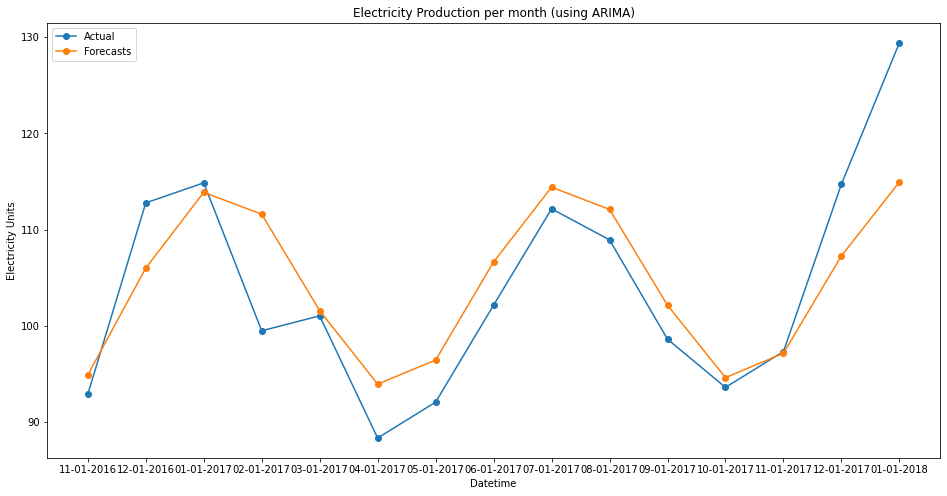

In [26]:
fig, ax = plt.subplots(figsize = (16, 8))

ax.plot(forecast.index, forecast['Actual'][-15:], marker='o', label='Actual', linestyle='-')
ax.plot(forecast.index, forecast['Prediction'], marker='o', label='Forecasts', linestyle='-')
ax.set_title("Electricity Production per month (using ARIMA)")
ax.set_xlabel("Datetime")
ax.set_ylabel("Electricity Units")
ax.legend()

plt.show()

#### MSE and MAE:

In [27]:
print(mean_squared_error(forecast['Actual'], forecast['Prediction']))

37.43448773443912


In [28]:
print(mean_absolute_error(forecast['Actual'], forecast['Prediction']))

4.592987710223446


### Forecasting:

In [29]:
forecast = model.predict(n_periods=60)
forecast = pd.DataFrame(forecast, columns=['Prediction'])
forecast.index = pd.to_datetime(forecast.index)
forecast.index = forecast.index.strftime('%d-%m-%Y')

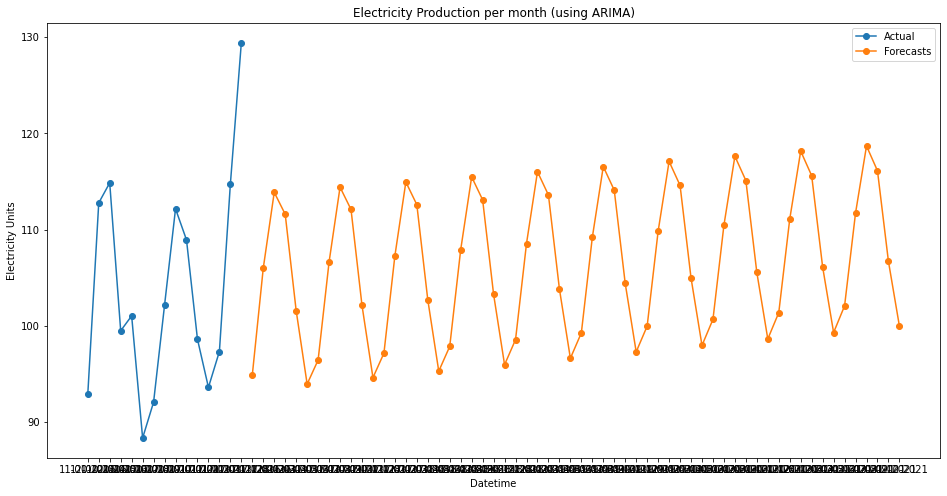

In [30]:
fig, ax = plt.subplots(figsize = (16, 8))

ax.plot(df.index[-15:], df['Value'][-15:], marker='o', label='Actual', linestyle='-')
ax.plot(forecast.index, forecast['Prediction'], marker='o', label='Forecasts', linestyle='-')
ax.set_title("Electricity Production per month (using ARIMA)")
ax.set_xlabel("Datetime")
ax.set_ylabel("Electricity Units")
ax.legend()

plt.show()

## 3. Exponential Smoothing:

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
model = ExponentialSmoothing(endog = df.Value[:-15], trend = 'add', seasonal = 'add', seasonal_periods= 12).fit()

## Testing Exponential Smoothing:

In [33]:
num_forecasts = 15
pred = model.forecast(steps = num_forecasts)

In [34]:
new_index = pd.date_range(df.index[-1], periods = num_forecasts, freq = 'M')
pred_df = pd.DataFrame(pred.values, columns = ['Forecasts'], index = new_index)
pred_df['Actual'] = df.Value[-15:].values

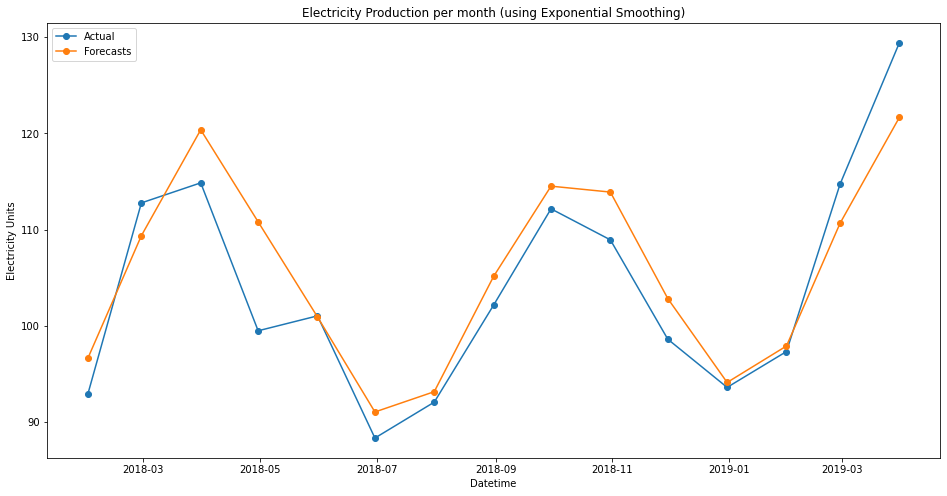

In [35]:
fig, ax = plt.subplots(figsize = (16, 8))

ax.plot(pred_df.index, pred_df['Actual'], marker='o', label='Actual', linestyle='-')
ax.plot(pred_df.index, pred_df['Forecasts'], marker='o', label='Forecasts', linestyle='-')
ax.set_title("Electricity Production per month (using Exponential Smoothing)")
ax.set_xlabel("Datetime")
ax.set_ylabel("Electricity Units")
ax.legend()

plt.show()

#### MSE and MAE:

In [36]:
print(mean_squared_error(pred_df['Actual'], pred_df['Forecasts']))

21.756759613828034


In [37]:
print(mean_absolute_error(pred_df['Actual'], pred_df['Forecasts']))

3.6850185493875633


## Future Forecasts:

In [38]:
num_forecasts = 60
pred = model.forecast(steps = num_forecasts)
new_index = pd.date_range(df.index[-1], periods = num_forecasts, freq = 'M')
pred_df = pd.DataFrame(pred.values, columns = ['Forecasts'], index = new_index)
pred_df.index = pd.to_datetime(pred_df.index)
pred_df.index = pred_df.index.strftime('%d-%m-%Y')
pred_df.head()

,Forecasts
31-01-2018,96.618044
28-02-2018,109.364392
31-03-2018,120.361027
30-04-2018,110.800769
31-05-2018,100.928278


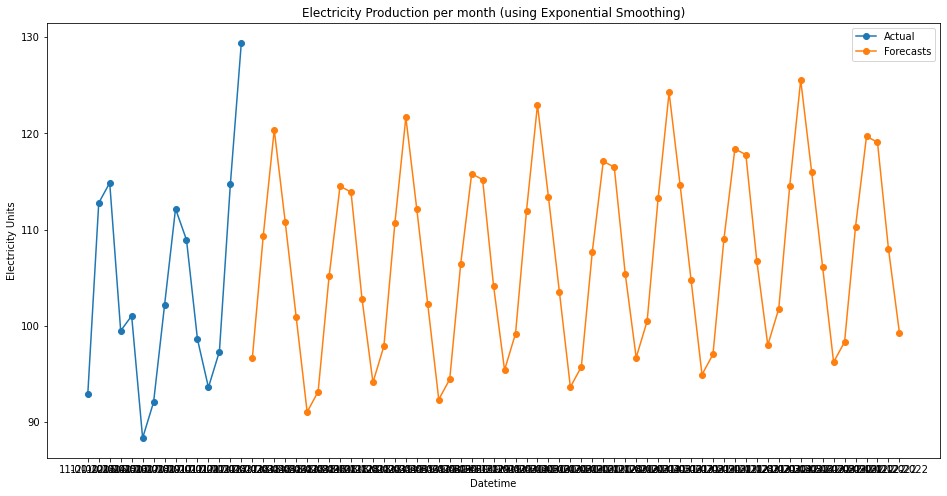

In [39]:
fig, ax = plt.subplots(figsize = (16, 8))

ax.plot(df.index[-15:], df['Value'][-15:], marker='o', label='Actual', linestyle='-')
ax.plot(pred_df.index, pred_df['Forecasts'], marker='o', label='Forecasts', linestyle='-')
ax.set_title("Electricity Production per month (using Exponential Smoothing)")
ax.set_xlabel("Datetime")
ax.set_ylabel("Electricity Units")
ax.legend()

plt.show()